# Decision Tree Classifier

In [1]:
CSV_LOCATION = '../datasets/heart-disease/heart_2020_cleaned.csv'

In [2]:
# Import dataset from file

import pandas as pd

data = pd.read_csv(CSV_LOCATION, low_memory=False)

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Preprocess the data

data2 = data.copy()

def min_max_scaling(series):
  """ Normalise value as explained in https://datagy.io/pandas-normalize-column/ """
  return (series - series.min()) / (series.max() - series.min())

data2['HeartDisease'] = pd.Categorical(data2['HeartDisease'])

# Categorise BMI as per https://www.health.nsw.gov.au/heal/Pages/bmi.aspx
data2['BMI'] = pd.cut(
  data2['BMI'],
  bins=[0, 18.5, 25, 30, 100],
  labels=[0, 1, 2, 3] # ['Underweight', 'Normal', 'Overweight', 'Obese']
)

data2['Smoking'] = pd.Categorical(data2['Smoking'])
data2['AlcoholDrinking'] = pd.Categorical(data2['AlcoholDrinking'])
data2['Stroke'] = pd.Categorical(data2['Stroke'])

data2['PhysicalHealth'] = min_max_scaling(data2['PhysicalHealth'])
data2['MentalHealth'] = min_max_scaling(data2['MentalHealth'])

data2['DiffWalking'] = pd.Categorical(data2['DiffWalking'])
data2['Sex'] = pd.Categorical(data2['Sex'])
data2['AgeCategory'] = pd.Categorical(data2['AgeCategory'])
data2['Race'] = pd.Categorical(data2['Race'])
data2['Diabetic'] = pd.Categorical(data2['Diabetic'])
data2['PhysicalActivity'] = pd.Categorical(data2['PhysicalActivity'])
data2['GenHealth'] = pd.Categorical(data2['GenHealth'])

# Categorise amount of sleep as per https://www.sleep.org/how-sleep-works/how-many-hours-of-sleep-do-we-need/
data2['SleepTime'] = pd.cut(
  data2['SleepTime'],
  bins=[0, 7, 9, 24],
  labels=['Low', 'Normal', 'High']
)

data2['Asthma'] = pd.Categorical(data2['Asthma'])
data2['KidneyDisease'] = pd.Categorical(data2['KidneyDisease'])
data2['SkinCancer'] = pd.Categorical(data2['SkinCancer'])

data2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,Low,Yes,No,Yes
1,No,1,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,Low,No,No,No
2,No,2,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,Normal,Yes,No,No
3,No,1,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,Low,No,No,Yes
4,No,1,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,Normal,No,No,No


The amounts of sleep are based on adult requirements, which are different to what is expected for children, babies, etc. It may be worthwhile for accuracy sake to set this label based on what is expected of that age. As well as this, using three bins may also not be detailed enough, so it could be good to extend this further.

Also, the normalised properties have not removed outliers and as a result these can potentially make a big impact of the normalised values. It would probably be good to filter out these outliers.

In [4]:
TEST_SIZE = 0.05
MAX_DEPTH = 4

In [5]:
# Format data for decision tree and create train/test split

from sklearn.model_selection import train_test_split

data3 = data2.copy()

Y = data3['HeartDisease']
X = pd.get_dummies(data3.drop(['HeartDisease'], axis=1), drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE)

Training set accuracy: 0.915
Test set accuracy: 0.914


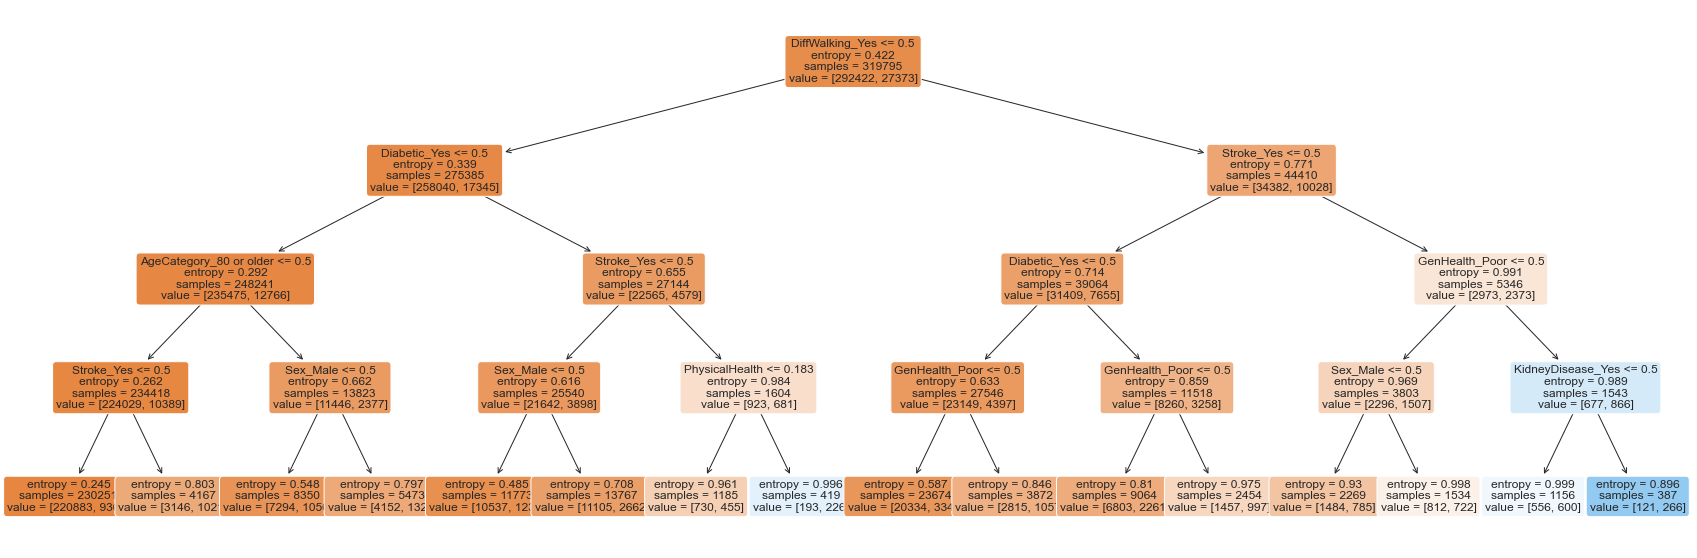

In [8]:
# Generate decision tree classifier

from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=MAX_DEPTH)
clf.fit(X, Y)

print(f'Training set accuracy: {clf.score(x_train, y_train):.3f}')
print(f'Test set accuracy: {clf.score(x_test, y_test):.3f}')

plt.figure(figsize=(40, 10))
tree.plot_tree(clf, filled=True, rounded=True, fontsize=12, feature_names=X.axes[1])
plt.show()

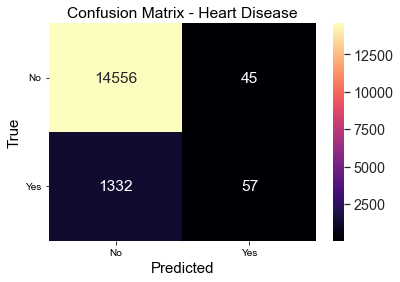

<Figure size 1080x720 with 0 Axes>

In [7]:
# Generate confusion matrix from testing the classifier

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

test_pred_decision_tree = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')

ax.set_title('Confusion Matrix - Heart Disease')
ax.set_xlabel('Predicted', fontsize=15)
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('True', fontsize=15)
ax.set_yticklabels(['No', 'Yes'], rotation=0)

plt.show()